In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, log_loss, accuracy_score

In [2]:
link="loan.csv"
df=pd.read_csv(link,index_col=0)

In [3]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
df.groupby("Loan_Status").Loan_Status.count()

Loan_Status
N    192
Y    422
Name: Loan_Status, dtype: int64

In [7]:
df.duplicated().any()

False

# Exploratory Data Analysis

Yes:  0.6872964169381107
No:  0.3127035830618892


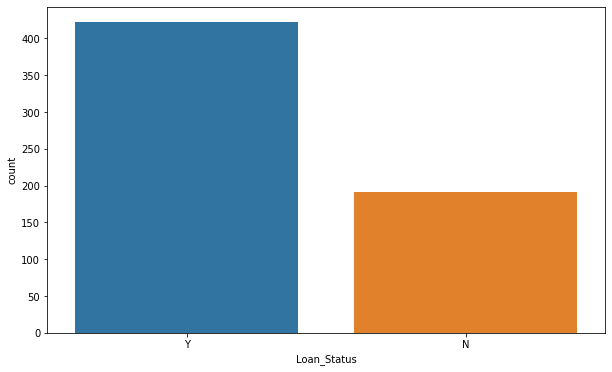

In [8]:
plt.figure(figsize=(10,6))
sns.countplot(df['Loan_Status'])
print("Yes: ", df.Loan_Status.value_counts()[0]/len(df))
print("No: ", df.Loan_Status.value_counts()[1]/len(df))

The data is though imbalanced but we will ignore that for now

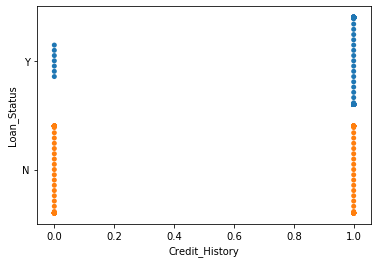

In [9]:
sns.swarmplot(x="Credit_History", y="Loan_Status", data=df)

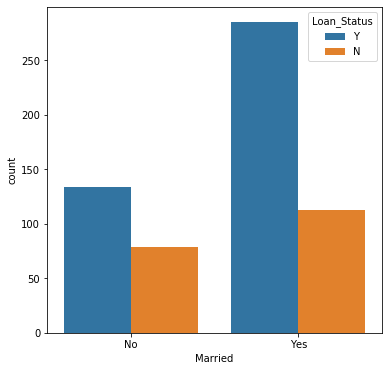

In [10]:
plt.figure(figsize=(6,6))
sns.countplot(x='Married', hue='Loan_Status', data=df)
# if one is married, the person has a higher chance of getting the loan

In [11]:
df.groupby("Dependents").Dependents.count()

Dependents
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

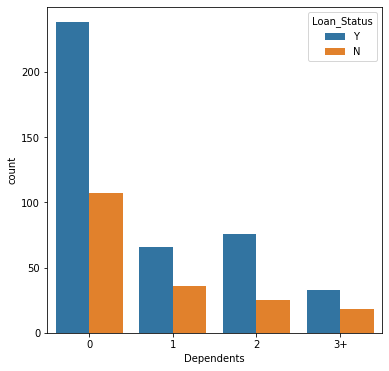

In [12]:
plt.figure(figsize=(6,6))
sns.countplot(x='Dependents', hue='Loan_Status', data=df)

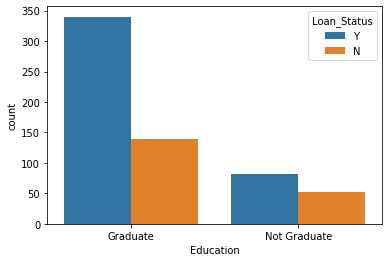

In [13]:
sns.countplot(x='Education',hue='Loan_Status',data=df)

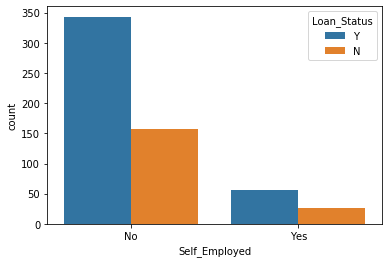

In [14]:
sns.countplot(x='Self_Employed',hue='Loan_Status',data=df)

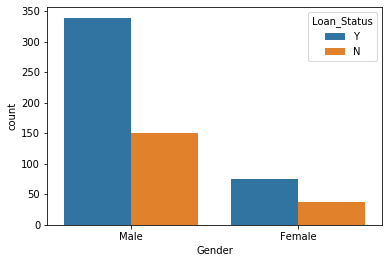

In [15]:
sns.countplot(x='Gender',hue='Loan_Status',data=df)

In [16]:
df.groupby("Loan_Status").median()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,
N,3833.5,268.0,129.0,360.0,1.0
Y,3812.5,1239.5,126.0,360.0,1.0


In [17]:
df.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_Status           0
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
dtype: int64

In [18]:
cat=[]
num=[]
for i,c in enumerate (df.dtypes):
    if c == object:
        cat.append(df.iloc[:,i])
    else:
        num.append(df.iloc[:,i])

In [19]:
cat= pd.DataFrame(cat).transpose()
num = pd.DataFrame(num).transpose()

In [20]:
cat.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
Loan_ID,,,,,,,
LP001002,Male,No,0,Graduate,No,Urban,Y
LP001003,Male,Yes,1,Graduate,No,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
LP001008,Male,No,0,Graduate,No,Urban,Y


In [21]:
num.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_ID,,,,,
LP001002,5849.0,0.0,NaN,360.0,1.0
LP001003,4583.0,1508.0,128.0,360.0,1.0
LP001005,3000.0,0.0,66.0,360.0,1.0
LP001006,2583.0,2358.0,120.0,360.0,1.0
LP001008,6000.0,0.0,141.0,360.0,1.0


In [22]:
cat=cat.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [23]:
num=num.apply(lambda x:x.fillna(x.mean()))

In [24]:
num.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [25]:
target = cat.Loan_Status
cat.drop(['Loan_Status'],axis = 1,inplace=True)

In [26]:
target_values = {'Y': 0 , 'N' : 1}
taget = target.map(target_values)

In [27]:
le = LabelEncoder()
for i in cat:
    cat[i]=le.fit_transform(cat[i])

In [28]:
df=pd.concat([cat,num,target],axis=1)

In [29]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,1,0,0,0,0,2,5849.0,0.0,146.412162,360.0,1.0,Y
LP001003,1,1,1,0,0,0,4583.0,1508.0,128.000000,360.0,1.0,N
LP001005,1,1,0,0,1,2,3000.0,0.0,66.000000,360.0,1.0,Y
LP001006,1,1,0,1,0,2,2583.0,2358.0,120.000000,360.0,1.0,Y
LP001008,1,0,0,0,0,2,6000.0,0.0,141.000000,360.0,1.0,Y


In [30]:
X = df.drop("Loan_Status",axis=1)
y=target

In [31]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_ID,,,,,,,,,,,
LP001002,1,0,0,0,0,2,5849.0,0.0,146.412162,360.0,1.0
LP001003,1,1,1,0,0,0,4583.0,1508.0,128.000000,360.0,1.0
LP001005,1,1,0,0,1,2,3000.0,0.0,66.000000,360.0,1.0
LP001006,1,1,0,1,0,2,2583.0,2358.0,120.000000,360.0,1.0
LP001008,1,0,0,0,0,2,6000.0,0.0,141.000000,360.0,1.0


In [32]:
y.head()

Loan_ID
LP001002    Y
LP001003    N
LP001005    Y
LP001006    Y
LP001008    Y
Name: Loan_Status, dtype: object

In [33]:
sss = StratifiedShuffleSplit(n_splits=1,random_state=1,test_size=0.2)
for train, test in sss.split(X,y):
    X_train, X_test = X.iloc[train], X.iloc[test]
    y_train, y_test = y.iloc[train], y.iloc[test]
    
print('X_train shape', X_train.shape)
print('y_train shape', y_train.shape)
print('X_test shape', X_test.shape)
print('y_test shape', y_test.shape)

# almost same ratio
print('\nRatio of target in y_train :',y_train.value_counts().values/ len(y_train))
print('Ratio of target in y_test :',y_test.value_counts().values/ len(y_test))
print('Ratio of target in original_data :',df['Loan_Status'].value_counts().values/ len(df))

X_train shape (491, 11)
y_train shape (491,)
X_test shape (123, 11)
y_test shape (123,)

Ratio of target in y_train : [0.68635438 0.31364562]
Ratio of target in y_test : [0.69105691 0.30894309]
Ratio of target in original_data : [0.68729642 0.31270358]
